# Sp char yield model run

### Import the relevant libraries

In [1]:
import numpy as np
import tensorflow as tf
import statsmodels.api as sm
import seaborn as sns
sns.set()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data

In [2]:
npz = np.load('sp10.npz')


train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.float)

npz = np.load('sp11.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.float)

npz = np.load('sp12.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.float)

### Model
Outline, optimizers, loss, early stopping and training

In [267]:
input_size = 3
output_size = 1
hidden_layer_size = 50
    
model = tf.keras.Sequential([
  
    tf.keras.layers.Dense(hidden_layer_size,'relu'),
    tf.keras.layers.Dense(hidden_layer_size,'relu'),

    tf.keras.layers.Dense(output_size,'linear') 
])




optimizer = tf.keras.optimizers.Adamax(learning_rate=0.01)

model.compile(optimizer, loss='MAE')



batch_size = 16

max_epochs = 150


early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)


model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, 
         
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Epoch 1/150
4/4 - 1s - loss: 0.5243 - val_loss: 0.3034
Epoch 2/150
4/4 - 0s - loss: 0.3232 - val_loss: 0.3294
Epoch 3/150
4/4 - 0s - loss: 0.2800 - val_loss: 0.2450
Epoch 4/150
4/4 - 0s - loss: 0.2241 - val_loss: 0.2373
Epoch 5/150
4/4 - 0s - loss: 0.2102 - val_loss: 0.2017
Epoch 6/150
4/4 - 0s - loss: 0.1918 - val_loss: 0.1851
Epoch 7/150
4/4 - 0s - loss: 0.1815 - val_loss: 0.1777
Epoch 8/150
4/4 - 0s - loss: 0.1688 - val_loss: 0.1448
Epoch 9/150
4/4 - 0s - loss: 0.1467 - val_loss: 0.1170
Epoch 10/150
4/4 - 0s - loss: 0.1458 - val_loss: 0.1113
Epoch 11/150
4/4 - 0s - loss: 0.1411 - val_loss: 0.1410
Epoch 12/150
4/4 - 0s - loss: 0.1370 - val_loss: 0.1540
Epoch 13/150
4/4 - 0s - loss: 0.1289 - val_loss: 0.1182
Epoch 14/150
4/4 - 0s - loss: 0.1177 - val_loss: 0.0952
Epoch 15/150
4/4 - 0s - loss: 0.1174 - val_loss: 0.1064
Epoch 16/150
4/4 - 0s - loss: 0.1124 - val_loss: 0.1096
Epoch 17/150
4/4 - 0s - loss: 0.1150 - val_loss: 0.1446
Epoch 18/150
4/4 - 0s - loss: 0.1208 - val_loss: 0.1000
E

Epoch 147/150
4/4 - 0s - loss: 0.0548 - val_loss: 0.0541
Epoch 148/150
4/4 - 0s - loss: 0.0437 - val_loss: 0.0737
Epoch 149/150
4/4 - 0s - loss: 0.0605 - val_loss: 0.0508
Epoch 150/150
4/4 - 0s - loss: 0.0462 - val_loss: 0.0472


In [279]:
model.evaluate(test_inputs,test_targets,verbose=2)

1/1 - 0s - loss: 0.0778


0.07784195989370346

# train data evaluation

In [280]:
train_outputs=np.squeeze(model(train_inputs)).round(2)
train_outputs

array([0.16, 0.47, 0.48, 0.68, 0.91, 0.56, 0.16, 0.24, 0.38, 0.4 , 0.05,
       0.37, 0.34, 0.83, 0.83, 0.51, 0.47, 0.68, 0.44, 0.22, 0.68, 0.79,
       0.42, 0.24, 0.64, 0.27, 0.4 , 0.97, 0.82, 0.03, 0.91, 0.63],
      dtype=float32)

In [281]:
train_targets.round(2)

array([[0.17],
       [0.54],
       [0.47],
       [0.75],
       [0.98],
       [0.59],
       [0.17],
       [0.24],
       [0.38],
       [0.41],
       [0.  ],
       [0.38],
       [0.41],
       [0.81],
       [0.86],
       [0.49],
       [0.35],
       [0.71],
       [0.57],
       [0.27],
       [0.7 ],
       [0.75],
       [0.42],
       [0.27],
       [0.67],
       [0.22],
       [0.43],
       [1.  ],
       [0.88],
       [0.06],
       [0.92],
       [0.64]])

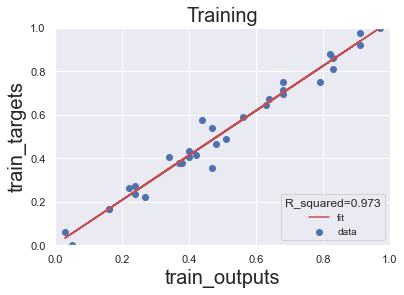

In [282]:
import matplotlib.pyplot as plt
plt.scatter(train_outputs,train_targets,label='data')
x= train_outputs
y=train_targets
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,'r',label='fit')
plt.legend(loc='lower right',title='R_squared=0.973',fontsize=10)
plt.title('Training',fontsize=20)
plt.xlabel('train_outputs',fontsize=20)
plt.ylabel('train_targets',fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [283]:
b = train_targets
a1 = train_outputs
a = sm.add_constant(a1)
results = sm.OLS(b,a).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1077.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           4.60e-25
Time:                        20:20:37   Log-Likelihood:                 54.527
No. Observations:                  32   AIC:                            -105.1
Df Residuals:                      30   BIC:                            -102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.018      0.158      0.876      -0.033       0.039
x1             1.0273      0.031     32.810      0.000       0.963       1.091
==============================================================================
Omnibus:                        5.161   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                4.873
Skew:                          -0.293   Prob(JB):                       0.0875
Kurtosis:                       4.820   Cond. No.                         4.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Test data evaluation

In [284]:
test_outputs=np.squeeze(model(test_inputs)).round(2)
test_outputs

array([ 0.25,  0.73,  0.46,  0.08,  0.9 , -0.02,  0.49,  0.51],
      dtype=float32)

In [285]:
test_targets.round(2)

array([[0.33],
       [0.89],
       [0.43],
       [0.12],
       [0.9 ],
       [0.12],
       [0.58],
       [0.58]])

## Average error

In [292]:
a=model.evaluate(test_inputs,test_targets)*18.92

   
f'average error equals {a}', f'error percentage equals {(a/34.517)*100}%'

1/1 [==============================] - 0s 20ms/step - loss: 0.0778


('average error equals 1.4727698811888696',
 'error percentage equals 4.266795727290522%')

In [297]:
p=[]
for i in range(len(test_targets)):
    a=abs(test_targets[i]-test_outputs[i])
    p.append(a*18.92/34.517)
print(max(p),min(p))

[0.08976445] [0.00237565]


In [296]:
a=model.evaluate(test_inputs,test_targets)*18.92

   
f'average error equals {a}', f'error percentage equals {(a/34.517)*100}%'

1/1 [==============================] - 0s 19ms/step - loss: 0.0778


('average error equals 1.4727698811888696',
 'error percentage equals 4.266795727290522%')

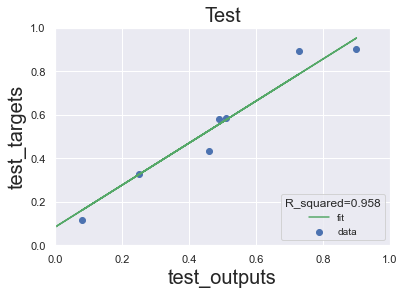

In [287]:
import matplotlib.pyplot as plt
plt.scatter(test_outputs,test_targets,label='data')
x= test_outputs
y=test_targets
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,'g',label='fit')
plt.legend(loc='lower right',title='R_squared=0.958',fontsize=10)
plt.title('Test',fontsize=20)
plt.xlabel('test_outputs',fontsize=20)
plt.ylabel('test_targets',fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)

plt.show()

In [288]:
y = test_targets
x1 = test_outputs
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\mady\Anaconda3\envs\Mywork\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           2.34e-05
Time:                        20:20:44   Log-Likelihood:                 11.307
No. Observations:                   8   AIC:                            -18.61
Df Residuals:                       6   BIC:                            -18.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0837      0.043      1.968      0.097      -0.020       0.188
x1             0.9661      0.083     11.710      0.000       0.764       1.168
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.195
Skew:                           0.141   Prob(JB):                        0.907
Kurtosis:                       2.290   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Saving the model

In [228]:
model.save('sp_char_model.h5') 

### retrieving the model

In [3]:
model = tf.keras.models.load_model('sp_char_model.h5')

In [4]:
import joblib
trans1=joblib.load('f1')
trans2=joblib.load('f2')

### Model deployment

In [6]:
C=float(input('enter your carbon percentage%:>>>'))
H=float(input('enter your hydrogen percentage%:>>>'))
O=float(input('enter your oxygen percentage%:>>>'))
A=float(input('enter your ash percentage%:>>>'))
T=float(input('enter your temperature in c%:>>>'))
PS=float(input('enter your particle size:>>>'))
HR=float(input('enter your heating rate in c/min:>>>'))



a=np.array([[C,H,O,A,T,PS,HR],
           ])

x= trans1.transform(a)


y=model(x)
real_y= trans2.inverse_transform(y)




print(f'your char yield wt% equals{real_y}')

enter your carbon percentage%:>>>44
enter your hydrogen percentage%:>>>8
enter your oxygen percentage%:>>>44
enter your ash percentage%:>>>33
enter your temperature in c%:>>>500
enter your particle size:>>>0.7
enter your heating rate in c/min:>>>30
your char yield wt% equals[[60.7866707]]


### Model optimization

In [301]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.optimize import dual_annealing
from scipy.optimize import NonlinearConstraint
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

### Dual annealing optimizer

In [302]:
def objective(x, sign=-1.0):  
    
    z=np.array([x,])
    y=model.predict_on_batch(z)
    return float(np.squeeze(sign*y))


# def constraint1(x):
    
#     z=np.array([x,])
#     b= list(np.squeeze(trans1.inverse_transform(z)))
#     C=b[0]
#     H=b[1]
#     O=b[2]
#     N=b[3]
#     S=b[4]
#     return (C+H+O+N+S)
# cons= NonlinearConstraint(constraint1, 12., 100.)



b1 = (0.,1.)
b2 = (0.,1.)
b3 = (0.,1.)
b4 = (0.,1.)
b5 = (0.,1.)
b6=  (0.,1.)
b7=  (0.,1.)


bnds= (b1,b2,b3,b4,b5,b6,b7)
# x0=[0.9999,0.1221,0.000047,0.66769,0.7336]


sol = dual_annealing(objective,bounds=bnds,maxiter=1000)

print(sol)

     fun: -1.8084663152694702
 message: ['Maximum number of iteration reached']
    nfev: 15113
    nhev: 0
     nit: 1000
    njev: 139
  status: 0
 success: True
       x: array([0.33260867, 1.        , 1.        , 1.        , 0.        ,
       0.99998181, 0.48575318])


In [303]:
print(trans1.inverse_transform((sol.x).reshape(1,-1)))
f'the maximum char yield wt% equals {trans2.inverse_transform(np.array([-sol.fun]).reshape(-1,1))}'

[[ 43.28171709   8.27        54.12        14.83       350.
    3.19994635  26.85889305]]


'the maximum char yield wt% equals [[59.02618268]]'

### Significance test

In [7]:
list1= ['C','H','O','A','T','PS','HR']
w=[]
b={}
inp=train_inputs
inp = tf.Variable(inp, dtype=tf.float32)

with tf.GradientTape() as tape:
    preds = model(inp)
grads = np.squeeze(tape.gradient(preds, inp))

for i in range(train_inputs.shape[1]):
    a=sum((grads[:,i])**2)/(train_inputs.shape[0])
    w.append(a.round(5))
for i in range(train_inputs.shape[1]):
    b[list1[i]]=w[i]
print(b)

{'C': 0.04997, 'H': 0.04239, 'O': 0.03432, 'A': 0.49525, 'T': 0.59044, 'PS': 0.06283, 'HR': 0.0984}


In [8]:
t=[]
for i in w:
    t.append((i/sum(w)).round(3))
print(t)

[0.036, 0.031, 0.025, 0.361, 0.43, 0.046, 0.072]


[Text(0.5, 0, 'variables'), Text(0, 0.5, 'sensitivity')]

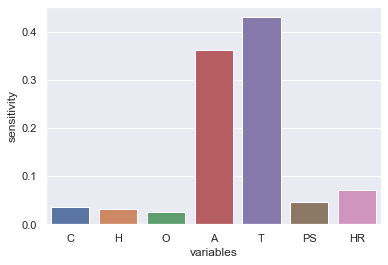

In [9]:
sns.barplot(x=list1,y=t).set(xlabel='variables',ylabel='sensitivity')